# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [28]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Defining functions

In [29]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

def gaussian_1d(x, amp, x0, sigma):
    '''
    Return a Gaussian distribution that is normalized to 1.0
             
    Input:
        x [double]       : offset
        amp [double]     : amplitude
        x0 [double]      : central position of the Gaussian
        sigma [double]   : standard deviation of the Gaussian
            
    Return:
        [double]   : A 1-dim Gaussian function
    '''
    
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    xdiff = x - x0    
    B = -0.5 * (( xdiff/sigma )**2.0)

    return amp * A * np.exp(B)


## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [30]:
num_x = 300
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

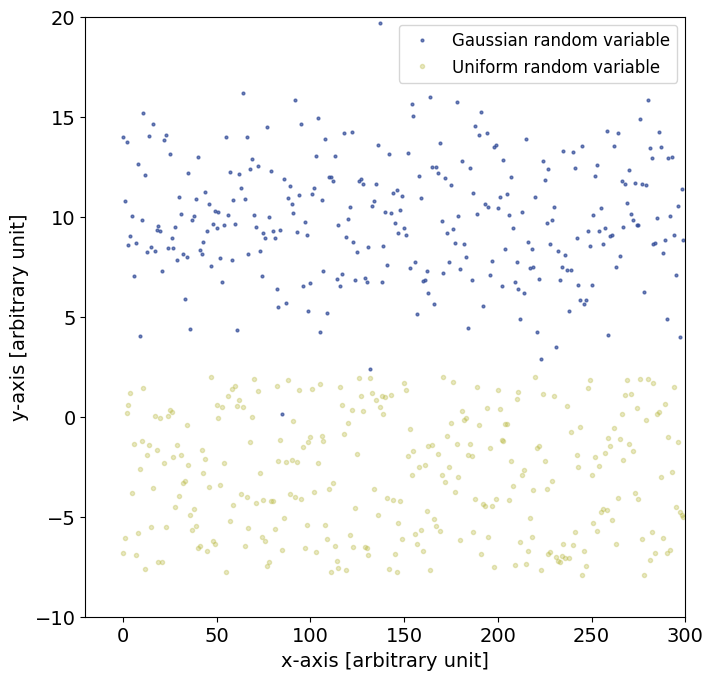

In [31]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

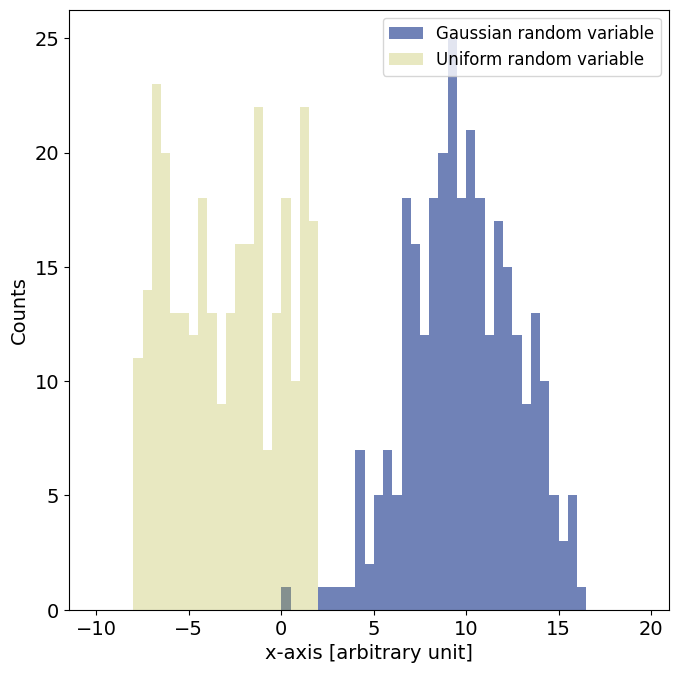

In [32]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [33]:
num_x = num_x
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

a       = 10.0
b       = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a, b) + y_err
print(y)

[ 553.41706987  827.89787224  691.31305161  792.43321107  286.33343218
 1048.27651302  820.89479597  681.28833223  836.43492265  700.89372767
  514.83255894  692.55697257  970.83373524  412.55635491  132.26404441
  126.42149092  549.3206942   859.90540215  136.6198176   367.80742239
  726.75529736  110.51770081  118.55810523  722.75454904  233.32646144
  188.18167293  972.41580045  883.60473654  568.26993445  457.466175
  846.8890131   747.39865562  660.84384462 1114.69689609  171.74064124
  923.80617377  244.62795451  556.88317336  816.74295911  971.10509145
  289.80577942  542.52794442   99.89918333  871.24166301  160.68447955
  974.5816712   242.10312014  873.87471026  681.10470767  385.38132507
 1001.13552812  893.95445856  458.26144912  348.39313247  192.65517907
  787.14509297  790.73194374  755.19512581  166.33060952  959.0034352
  362.39077845  427.43450464  245.16950418  199.08570672  981.49136627
  882.68554514  233.401157    653.83759528   96.58542029  683.95748905
 1108.081

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [34]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [35]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[44.50997213 76.40571299 60.49326803 71.55419662 13.02438132 93.65254642
 67.90158304 58.52186447 78.26951389 67.3832897  40.32411617 67.370563
 82.78562337 32.04030255  4.4259158  10.56661264 48.22331991 79.31560933
  8.76213429 27.10708045 63.33787173  3.03943797  0.41803662 54.14303384
 14.72023794  7.8947804  85.13730246 87.05408733 52.9489064  39.02876093
 69.21060257 65.23874134 53.82071776 96.94589302  8.62574816 82.34316229
 10.11690566 43.87116141 73.19030799 87.0125791  16.72939002 47.52409577
  6.99652284 72.15822499 10.88581356 89.83260359 12.89888826 76.78381481
 60.58775565 26.56477654 89.34216909 83.66384463 35.53413937 26.96123428
 13.0113152  67.19421717 70.65365832 66.02859589 11.66904308 82.42077613
 24.82854517 33.77804604 17.54173293  9.40461036 85.12308967 78.89735141
 19.15180863 54.42913916  1.8954432  52.6487616  98.93391409 37.29936137
 26.38220547 44.83279531 31.10980724 92.27891014 60.35716367  4.95425466
 14.88116366 37.07238876 10.753

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [36]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

             x            y  y_err
0    44.509972   553.417070   30.0
1    76.405713   827.897872   30.0
2    60.493268   691.313052   30.0
3    71.554197   792.433211   30.0
4    13.024381   286.333432   30.0
..         ...          ...    ...
295  23.183073   339.029978   30.0
296  43.031955   509.853589   30.0
297  73.615881   905.981125   30.0
298   9.923665   218.416197   30.0
299  95.066389  1096.859432   30.0

[300 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [37]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

             x            y  y_err
0    44.509972   553.417070   30.0
1    76.405713   827.897872   30.0
2    60.493268   691.313052   30.0
3    71.554197   792.433211   30.0
4    13.024381   286.333432   30.0
..         ...          ...    ...
295  23.183073   339.029978   30.0
296  43.031955   509.853589   30.0
297  73.615881   905.981125   30.0
298   9.923665   218.416197   30.0
299  95.066389  1096.859432   30.0

[300 rows x 3 columns]


In [38]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0      44.509972
1      76.405713
2      60.493268
3      71.554197
4      13.024381
         ...    
295    23.183073
296    43.031955
297    73.615881
298     9.923665
299    95.066389
Name: x, Length: 300, dtype: float64
 
0       553.417070
1       827.897872
2       691.313052
3       792.433211
4       286.333432
          ...     
295     339.029978
296     509.853589
297     905.981125
298     218.416197
299    1096.859432
Name: y, Length: 300, dtype: float64


#### 2.3.3 Plotting the loaded data

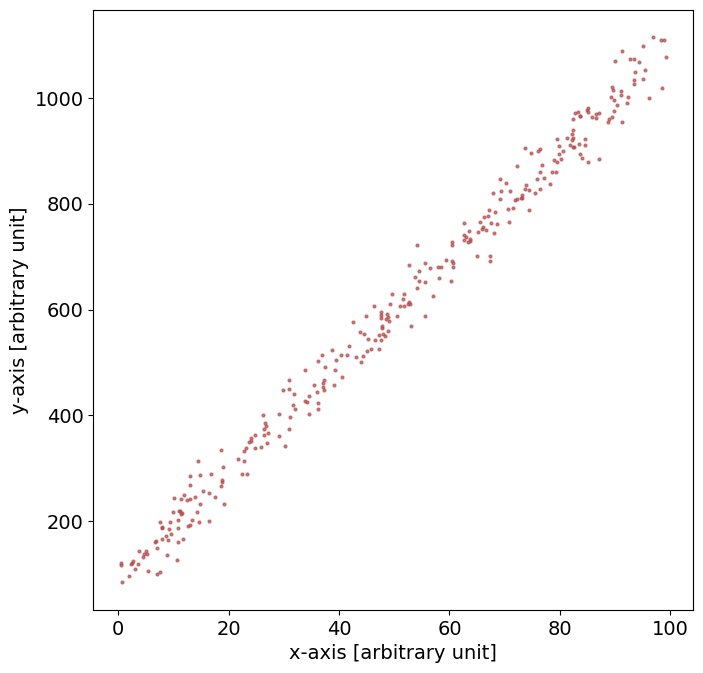

In [39]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### Defining functions

In [40]:
def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )

### 3.1 Home made code to fit the 1D polynomial model

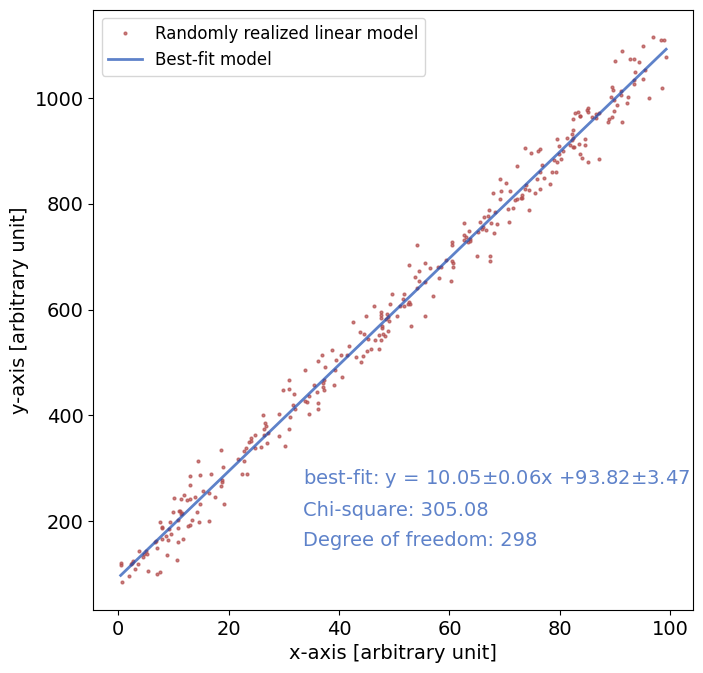

In [41]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# Equations in Section 15.2 (Fitting Data to a straight line) of W. H. Press, Numerical Receipes, 3rd ed.
# Note that the definition of a and b is interchanged.
S = np.sum(
           1.0 / (df_read.y_err**2)
          )
Sx = np.sum(
            df_read.x / (df_read.y_err**2)
           )
Sy = np.sum(
            df_read.y / (df_read.y_err**2)
           )
Sxx = np.sum(
             (df_read.x**2) / (df_read.y_err**2)
            )
Sxy = np.sum(
             (df_read.x*df_read.y) / (df_read.y_err**2)
            )
Delta = S * Sxx - Sx**2

popt = np.zeros(2)
perr = np.zeros(2)

popt[1]     = (Sxx*Sy - Sx*Sxy) / Delta
popt[0]     = (S*Sxy - Sx*Sy)   / Delta

perr[1]     = np.sqrt( Sxx / Delta )
perr[0]     = np.sqrt( S / Delta )

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.35, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.35, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('HM_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.2 Scipy fitting of the 1D polynomial model

Best-fit a:  10.052409284141792   Best-fit b:  93.82347567677263
a error:  0.06089061910382664   b error : 3.5082905636415913


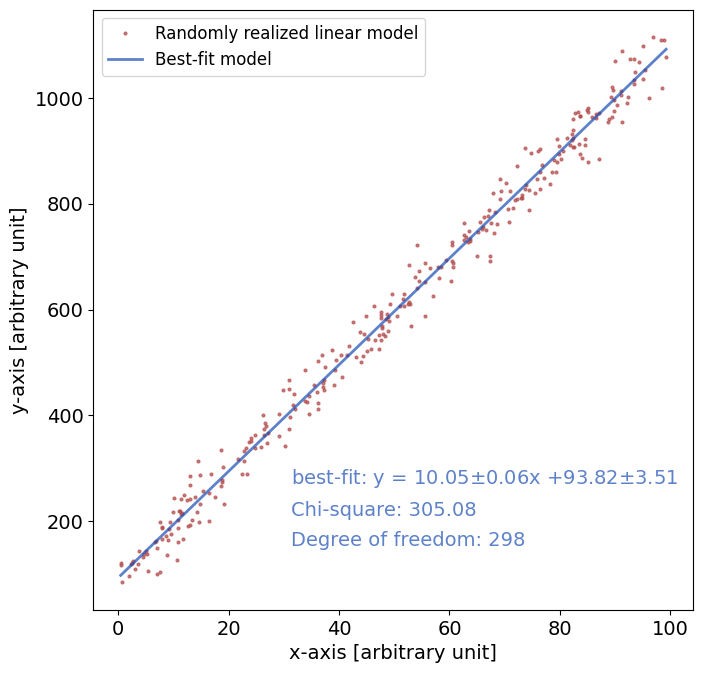

In [42]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                       sigma = df_read.y_err # standard measurement error
                      )

# evaluating the uncertainties of fit parameters from the covariant matrix
perr = np.sqrt(np.diag(pcov))

print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
print('a error: ', perr[0], '  b error :', perr[1])

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################


# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.33, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.33, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.1 Using bootstraping to estimate the uncertainties of fit parameters and confidence level

In [43]:
# defining a function to include Gaussian random errors in the synthetic model
# (if the error is not Gaussian, you can change the form accordingly)

def adderror(y, e_err):
    '''
    A function to include errors in the synthetic measurements.
    '''
    
    return y + np.random.normal(loc = np.zeros(len(y)), scale = y_err)

In [44]:
# number of bootstraping iterations
num_iter = 1000

# create an array to store the fitting results of synthetic data
chisq_boot = np.zeros(num_iter)
a_boot     = np.zeros(num_iter)
b_boot     = np.zeros(num_iter)

# Obtaining the best-fit parameters
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                      )
chi2       = chisquare(df_read.x, df_read.y, myline(df_read.x, popt[0], popt[1]) )


# construct the best-fit model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])

# bootstraping
for i in range(0, num_iter):
    
    # fit the synthetic data
    y_synthetic = adderror(ymodel, df_read.y_err)
    popt_temp, pcov_temp = curve_fit(myline, x_sort, y_synthetic, sigma = df_read.y_err)
    
    # evaluate chi-square
    chi2_temp = chisquare(x_sort, y_synthetic, myline(x_sort, popt_temp[0], popt_temp[1]) )
    
    # store the results
    chisq_boot[i] = chi2_temp
    a_boot[i]     = popt_temp[0]
    b_boot[i]     = popt_temp[1]
    
# evaluate the mean and standard deviations of chi-square and fit parameters
a_mean   = np.mean( a_boot )
a_stddev = np.std( a_boot )
b_mean   = np.mean( b_boot )
b_stddev = np.std( b_boot )

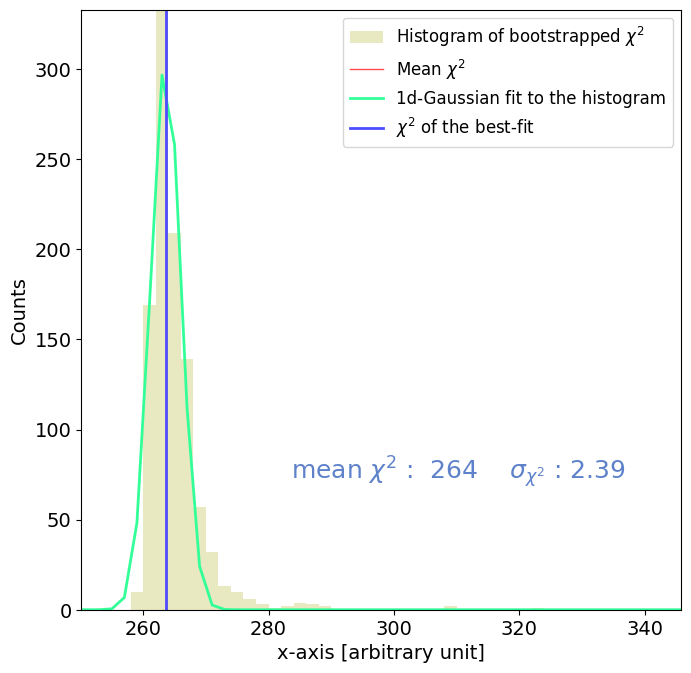

In [45]:
# plotting histograms of the bootstraping results
# chi-square

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

deg_o_f = len(df_read.x) - 2
n_bin   = 100
halfhistwidth = 100
binwidth      = halfhistwidth * 2 / n_bin
bins = np.arange(deg_o_f-halfhistwidth, deg_o_f+halfhistwidth, binwidth)
bin_centers = np.zeros(n_bin - 1)
for i in range(0, n_bin - 1):
    bin_centers[i] = (bins[i] + bins[i+1])/2.0

histogram = plt.hist(chisq_boot, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = r"Histogram of bootstrapped $\chi^{2}$"
        )

# evaluate the mean and standard deviations of chi-square and fit parameters
# using gaussian fittings
bin_centers = np.array(bin_centers)
hist_popt, hist_pcov = curve_fit(gaussian_1d, bin_centers, histogram[0], p0=[1000.0, deg_o_f, 2])
chisq_mean = hist_popt[1]

# plot the mean of bootstrapped chi-square
x_plot = [chisq_mean, chisq_mean]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 1.0,
         color = (1, 0.3, 0.3, 1),
         label = r'Mean $\chi^{2}$'
        )

# plot the 1d-gaussian fittings to the bootstrap results
plt.plot(bin_centers, gaussian_1d(bin_centers, hist_popt[0],hist_popt[1],hist_popt[2]),
         '-', linewidth = 2.0,
         color = (0.2, 1.0, 0.6, 1),
         label = r'1d-Gaussian fit to the histogram'
        )

# text labeling
label_string = r'mean $\chi^{2}$ :  ' + str(round(hist_popt[1])) + '    '
label_string += r'$\sigma_{\chi^{2}}$ : ' + str(round(hist_popt[2] ,2))
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=18)

# plot the chi-square of the best fit
x_plot = [chi2, chi2]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 2.0,
         color = (0.3, 0.3, 1, 1),
         label = r'$\chi^{2}$ of the best-fit'
        )

# set the plot range of y-axis
xlim = (deg_o_f - hist_popt[2]*5, deg_o_f + hist_popt[2]*5)
plt.xlim( (deg_o_f - hist_popt[2]*20, deg_o_f + hist_popt[2]*20) ) 
plt.ylim( (0, np.max(histogram[0]) ) )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly_histogram_chisq.pdf', 
            transparent = True
           )

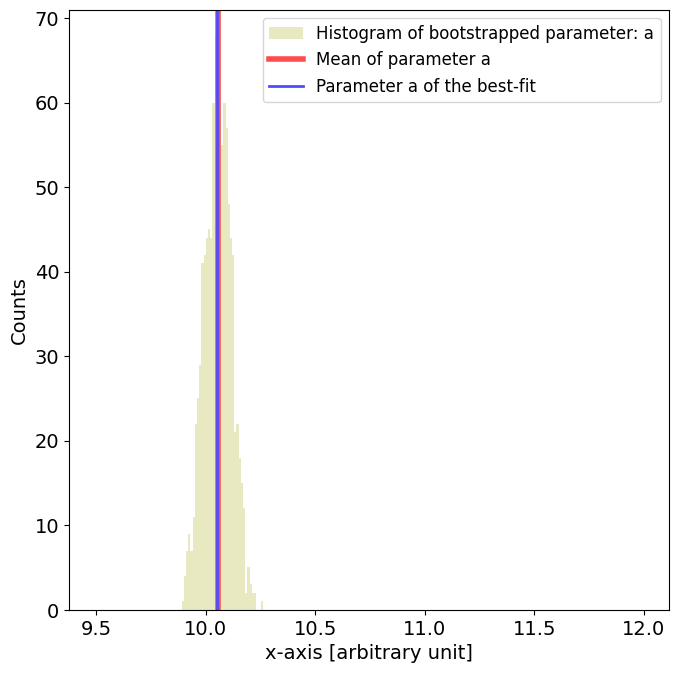

In [46]:
# plotting histograms of the bootstraping results
# chi-square

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(9.5, 12, 0.01)

histogram = plt.hist(a_boot, 
         bins=bins, 
         color=(0.7,0.7,0.2, 0.3),
         label = r"Histogram of bootstrapped parameter: a"
        )

# plot the mean of bootstrapped chi-square
x_plot = [a_mean, a_mean]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 4.0,
         color = (1, 0.3, 0.3, 1),
         label = r'Mean of parameter a'
        )

# plot the chi-square of the best fit
x_plot = [popt[0], popt[0]]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 2.0,
         color = (0.3, 0.3, 1, 1),
         label = r'Parameter a of the best-fit'
        )


# set the plot range of y-axis
plt.ylim( (0, np.max(histogram[0]) ) )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly_histogram_a.pdf', 
            transparent = True
           )

### 3.3 MCMC fitting of the 1D polynomial model
y = ax + b

In [47]:
# importing the package for MCMC fittings
import emcee, corner

In [48]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

You have 8 Processors


#### 3.3.1 Definining functions that are required in the MCMC model fittings

In [49]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if (-1e10 < a < 1e10) and \
       (-1e10 < b < 1e10):
        return 0.0
    
    return -np.inf


def log_likelihood(parms, x, y, y_err):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    ymodel = myline(x, a, b)
    
    ln_likelihood = -0.5 * chisquare(y, y_err, ymodel)
    
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.3.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [50]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 16    # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 1000 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

100%|█████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 139.40it/s]


State([[10.00265481 96.44308389]
 [10.07697814 93.62322418]
 [10.07253682 91.42818912]
 [10.03828049 92.9532808 ]
 [10.13924409 90.56338062]
 [10.01847901 94.18546317]
 [10.00774162 93.48475644]
 [10.05131198 91.38049262]
 [10.01261385 95.99545957]
 [10.14064568 90.93537075]
 [10.11773713 89.37689505]
 [10.03201351 91.98828043]
 [10.07080027 90.97919685]
 [10.05265811 92.38071513]
 [10.12261645 90.08074486]
 [10.14060527 88.33975113]], log_prob=[-152.88719197 -152.80112454 -152.92058396 -152.9835332  -153.77561513
 -152.99677958 -153.91705921 -153.58228641 -152.76671773 -154.00027022
 -153.36592859 -153.95654982 -153.20748486 -152.88331342 -153.23231943
 -153.81123269], blobs=None, random_state=('MT19937', array([3055019662, 1005228464,  554679201, 1221100855,  928953328,
       3470307341, 2635850503, 3428105064, 1132885771, 1576437082,
       3990221712, 2854458776,  916269970, 2236601884, 1845159467,
       1400610066, 2664757770,  919195040, 1201687880, 3221059940,
        66376722

#### 3.3.3 Plotting saplers

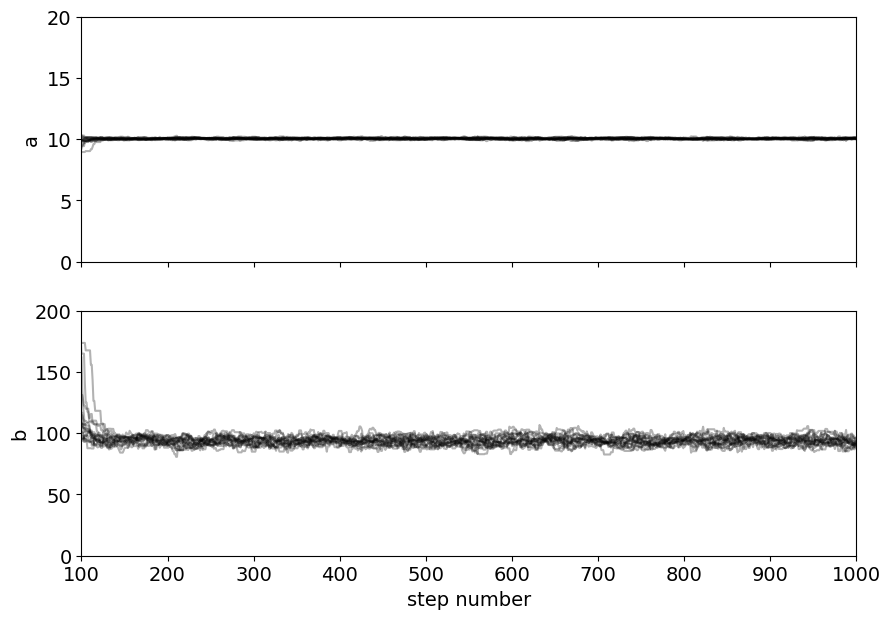

In [51]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.4 Making corner plot

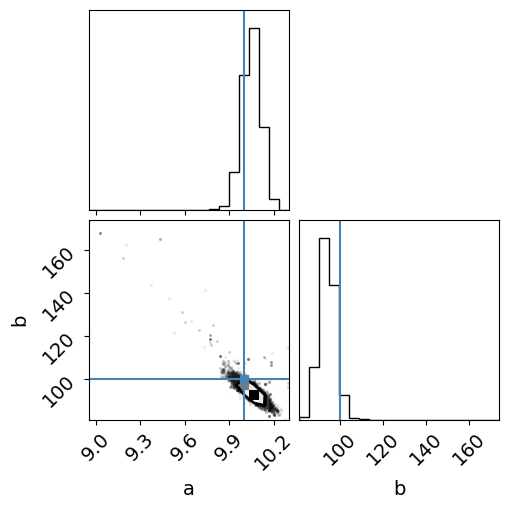

In [52]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )

fig = corner.corner(
                    flat_samples, labels = labels, truths=[a, b]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.5 Summarizing the results of MCMC fittings

In [53]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

a value is: 10.05-0.06/+0.06
b value is: 93.91-3.56/+3.54


#### 3.3.6 Plotting the MCMC fitting results

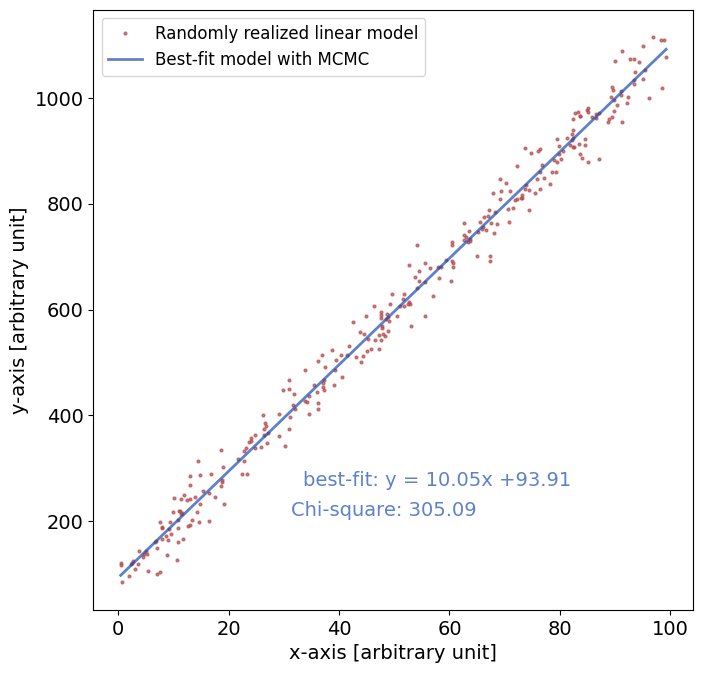

In [54]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# label chi-square
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, mcmc_a[1], mcmc_b[1] ) )
label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )